# Sponsor Net - Dataset analysis

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
con = sqlite3.connect('../data/database.db')
df = pd.read_sql_query("SELECT * FROM sponsorTimes --LIMIT 1000", con)
df['duration'] = df['endTime'] - df['startTime']
df['category'] = df['category'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246389 entries, 0 to 1246388
Data columns (total 17 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   videoID         1246389 non-null  object  
 1   startTime       1246389 non-null  float64 
 2   endTime         1246389 non-null  float64 
 3   votes           1246389 non-null  int64   
 4   locked          1246389 non-null  int64   
 5   incorrectVotes  1246389 non-null  int64   
 6   UUID            1246389 non-null  object  
 7   userID          1246389 non-null  object  
 8   timeSubmitted   1246389 non-null  float64 
 9   views           1246389 non-null  int64   
 10  category        1246389 non-null  category
 11  service         1246389 non-null  object  
 12  videoDuration   1246389 non-null  int64   
 13  hidden          1246389 non-null  int64   
 14  shadowHidden    1246389 non-null  int64   
 15  hashedVideoID   1246389 non-null  object  
 16  duration        12

## Filtering the dataset
We filter the SponsorBlock dataset in order to only use the most trainable and trustworthy data.

In [3]:
query = (df.votes >= 0) & (df.duration < 1000) & (df.category == 'sponsor')

## Count
This calculates the possible number of segments that could be used to assemble a training data set.

In [5]:
print("segment count:")
print(df[query].count())
print(f"video count: {df[query].videoID.count()}")

segment count:
videoID           488371
startTime         488371
endTime           488371
votes             488371
locked            488371
incorrectVotes    488371
UUID              488371
userID            488371
timeSubmitted     488371
views             488371
category          488371
service           488371
videoDuration     488371
hidden            488371
shadowHidden      488371
hashedVideoID     488371
duration          488371
dtype: int64
video count: 488371


## Some statistical data about the votes and duration of every segment
We decided to only include segments with at least 0 votes. SponsorBlock does not keep track of the individual number of up- and downvotes, it only provides it as the sum of all up- and down votes.

In [6]:
df.loc[query, ['votes', 'duration']].describe()

,votes,duration
count,"488,371.00","488,371.00"
mean,49.94,53.51
std,648.28,55.25
min,0.00,0.65
25%,0.00,19.00
50%,0.00,41.18
75%,2.00,71.07
max,"12,207.00",998.21


## Vote density
You can see that there is a small peak around 10000 votes. We hypothesize that the votes of VIP users count as 10000 votes.

<AxesSubplot:ylabel='Density'>

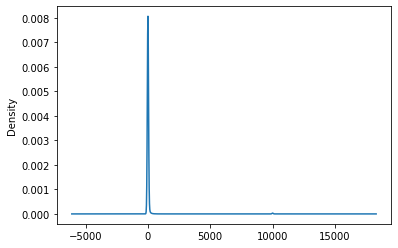

In [7]:
df[query].votes.plot.density()

<AxesSubplot:ylabel='Density'>

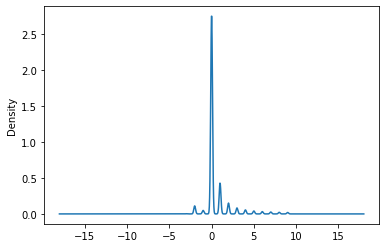

In [8]:
df[(df.votes > -10) & (df.votes < 10) & (df.duration < 1000) & ((df.category == 'sponsor') | (df.category == 'interaction')| (df.category == 'selfpromo'))].votes.plot.density()

<AxesSubplot:ylabel='Density'>

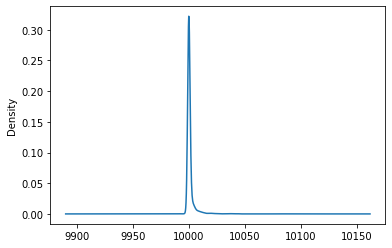

In [9]:
df[(df.votes > 9500) & (df.votes < 10100) & (df.duration < 1000) & ((df.category == 'sponsor') | (df.category == 'interaction')| (df.category == 'selfpromo'))].votes.plot.density()

## Segment Durations
This information could be used to exclude segments that are too long to be trusted.

In [10]:
df[query].duration.describe()

count             488,371.00
mean                   53.51
std                    55.25
min                     0.65
25%                    19.00
50%                    41.18
75%                    71.07
max                   998.21
Name: duration, dtype: float64

<AxesSubplot:ylabel='Density'>

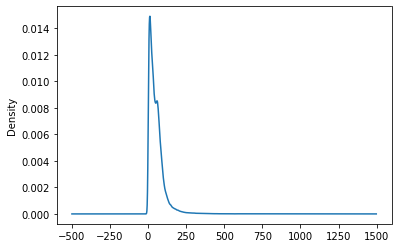

In [11]:
df[query].duration.plot.density()

## Categories
There are eight different categories, three of which could be used to train the network: sponsor, selfpromo and interaction.

In [12]:
df.category

0          sponsor
1          sponsor
2          sponsor
3          sponsor
4          sponsor
            ...   
1246384    sponsor
1246385      outro
1246386      outro
1246387    sponsor
1246388      outro
Name: category, Length: 1246389, dtype: category
Categories (8, object): ['interaction', 'intro', 'moreCategories', 'music_offtopic', 'offtopic', 'outro', 'selfpromo', 'sponsor']